# Time Series Approach

### Loading Data
1. Loaded `Sales.csv` file and returned only two columns those are Date and Weekkly_Sales. 
2. The loaded dataset represents `421570` records and `2` columns. Further, set Date columns as index of the DataFrame to make sure that the data is consisting with Time Series Approach. 

In [3]:
# To read dataset by csv file as DataFrame in jupyter (by using Pandas Library) 
import pandas as pd
orig_df = pd.read_csv(r'C:\Users\MiT Computer\Downloads\Machine Learning_Project\Sales.csv', 
                      parse_dates = ['Date'], usecols=['Date', 'Weekly_Sales'], index_col='Date')

In [4]:
print('Rows and Columns are: ' + str(orig_df.shape))
print('---------------------------------\n')
print(orig_df.head())
print('------------------------\n')

# Sum of Weekly Sales, and Partition by Date column.
groupby_date = pd.DataFrame(orig_df.groupby('Date')['Weekly_Sales'].sum())
print('Transformed Data')
print('------------------------\n')
print(groupby_date)

Rows and Columns are: (421570, 1)
---------------------------------

            Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-05      50605.27
2010-02-05      13740.12
2010-02-05      39954.04
2010-02-05      32229.38
------------------------

Transformed Data
------------------------

            Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]


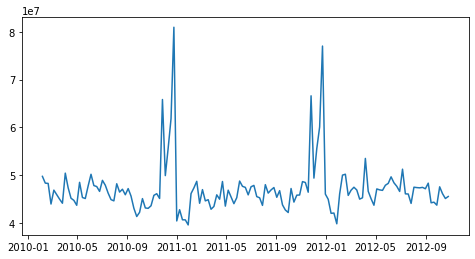

In [9]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(8,4))
plt.plot(groupby_date)

##### Statistical Information

In [10]:
print('The Rows of ' + str(groupby_date.count())) # Weekly Row Data 

The Rows of Weekly_Sales    143
dtype: int64


In [11]:
print('The Average of ' + str(groupby_date.mean())) # Checking Average 
# Rsult: 4*10**7

The Average of Weekly_Sales    4.711342e+07
dtype: float64


In [12]:
print('The Variance of ' + str(groupby_date.var())) # Checking Variance
# Rsult: 2*10**13

The Variance of Weekly_Sales    2.963938e+13
dtype: float64


In [13]:
print('The Standard Diviation of ' + str(groupby_date.std())) # Checking Standard Diviation
# Result: 5.444206e+06 = 5*10**6

The Standard Diviation of Weekly_Sales    5.444206e+06
dtype: float64


### Checking Stationarity

##### KPSS Test

`Assumption:` Null Hypothesis or Ho is Stationary. if `P-Values < 0.05`, we can reject Null Hypothesis or Ho, if else reversed.

In [15]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# KPSS testing
from statsmodels.tsa.stattools import kpss
stats, p, lags, critical_values = kpss(groupby_date['Weekly_Sales'], 'ct') # KPSS tested code.

print('KPSS Statistic: ' + str(stats))
print('P-Values: ' + str(p))
print('Lagged Values: ' + str(lags))
print('critical_values' + str(critical_values))
print(" ")
print(f'The result of KPSS testing shows that the series is {"not " if p > 0.05 else ""}"Stationarity"')

KPSS Statistic: 0.05156170005147511
P-Values: 0.1
Lagged Values: 14
critical_values{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
 
The result of KPSS testing shows that the series is not "Stationarity"


##### ADF Test or Augmented Dickey-Fuller Test
`Assumption:` Null Hypothesis or Ho is Not Stationary. if `P-Values < 0.05`, we can reject Null Hypothesis or Ho, if else reversed.

In [16]:
# ADF testing
from statsmodels.tsa.stattools import adfuller
results = adfuller(groupby_date['Weekly_Sales'], autolag = 'AIC' ) # ADF tested code.

print('ADF Statistic: ' + str(results[0]))
print('P-Values: ' + str(results[1]))
print('Critical Values: ' + str(results[4]))
print(' ')

print(f'As the result of ADF testing shows that the series is {"not " if results[1] > 0.05 else ""}"Stationarity"')

ADF Statistic: -5.908297957186331
P-Values: 2.675979158986058e-07
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
 
As the result of ADF testing shows that the series is "Stationarity"


### 1st Decomposition
`Addictive Model` is a model which is useful when the seasonal variation is relatively constant over time.

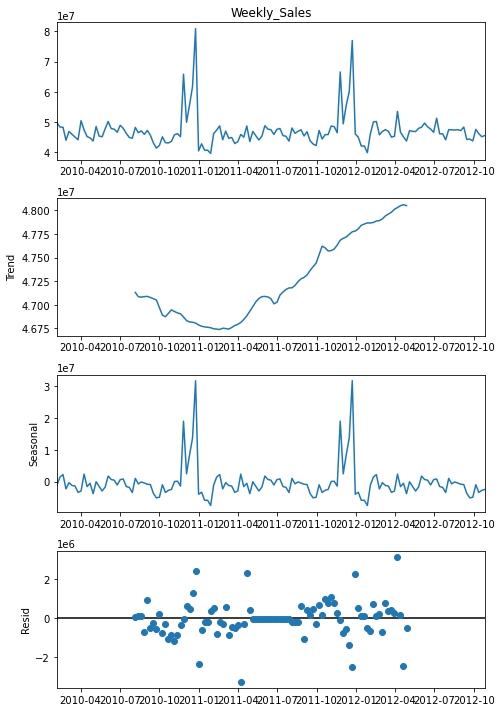

In [17]:
# Decomposition: Addictive model
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
add_result = seasonal_decompose(groupby_date['Weekly_Sales'], model='addictive')

# show as plots
plt.rcParams.update({'figure.figsize':(7,10)})
add_plot = add_result.plot()

In [18]:
# Decomposed addictive DataFrame
import pandas as pd
addiction_dec = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
addiction_dec.columns = ['seasonality', 'trend', 'residual', 'actual_values']
print(addiction_dec.head(100)) # show first 100 rows of the data. 

             seasonality         trend      residual  actual_values
Date                                                               
2010-02-05 -1.111343e+06           NaN           NaN    49750740.50
2010-02-12  1.441040e+06           NaN           NaN    48336677.63
2010-02-19  2.218925e+06           NaN           NaN    48276993.78
2010-02-26 -2.297806e+06           NaN           NaN    43968571.13
2010-03-05 -3.328953e+05           NaN           NaN    46871470.30
...                  ...           ...           ...            ...
2011-12-02  2.456468e+06  4.770276e+07 -7.686716e+05    49390556.49
2011-12-09  8.421031e+06  4.771710e+07 -5.769802e+05    55561147.70
2011-12-16  1.374775e+07  4.774542e+07 -1.407477e+06    60085695.94
2011-12-23  3.175044e+07  4.777185e+07 -2.524051e+06    76998241.31
2011-12-30 -3.970837e+06  4.777957e+07  2.233725e+06    46042461.04

[100 rows x 4 columns]


### Data Transformation

##### Log Transformation
logarithmic formula is: $Y = Logb(X)$, where Squared Root Formula is: $b^Y = X$. Log transformation is a transformed method in which it replaces each variable $X$ with a $Log(X)$. 

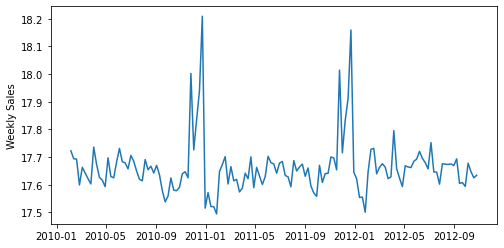

In [19]:
import numpy as np

# Log Transformation
tlog = groupby_date.apply(np.log)

data_transform = tlog
#print(data_transform)
# show as plots
plt.figure(figsize=(8,4))
plt.ylabel('Weekly Sales')
plt.plot(data_transform, linestyle='-', linewidth=1.5)

##### Rolling by Mean or Moving Average

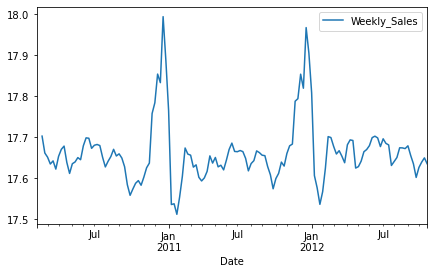

In [20]:
# Rolling Mean (window 4) 
rollmean = data_transform.rolling(window=3).mean()

# show as plots
plt.rcParams.update({'figure.figsize':(7,4)})
add_plot = rollmean.plot()

##### Subtract the Moving Average

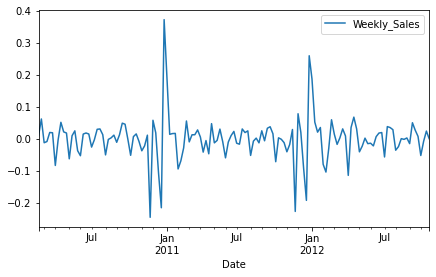

In [21]:
# Subtract the Moving Average
data_minus_rollmean = rollmean - data_transform
data_minus_rollmean.dropna(inplace=True) # drop NA values.
#print(data_minus_rollmean)
# show as plots
plt.rcParams.update({'figure.figsize':(7,4)})
add_plot = data_minus_rollmean.plot()

##### Differencing Data

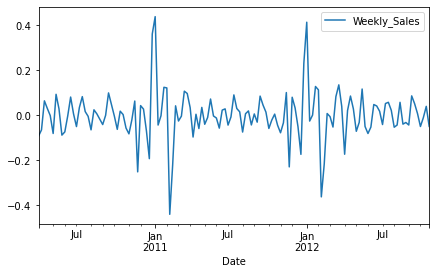

In [22]:
# Rolling by (periods = 31), our dataset is after differencing going to start from 2021-10-01.
data_diff = data_minus_rollmean.diff(periods=6) 

data_diff.dropna(inplace=True) # drop NA values.
# show as plots
plt.rcParams.update({'figure.figsize':(7,4)})
add_plot = data_diff.plot()

### 2nd Decomposition
Using Decomposing again to check whether it is readily stationary or NOT by consideration on `Trend`,`Residual` recardless `seasonality`.

As the result: The series is now more stationarity.


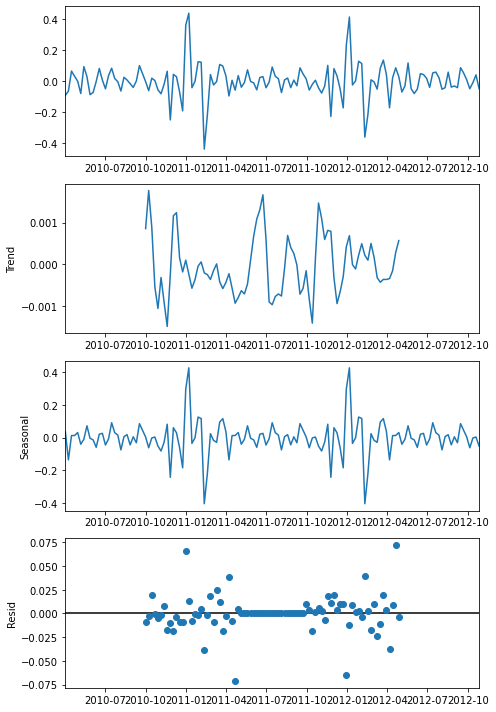

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decompose_data = seasonal_decompose(data_diff, model='addictive')

# show as plots
plt.rcParams.update({'figure.figsize':(7,10)})
add_plot = decompose_data.plot()
print('As the result: The series is now more stationarity.')

### ACF and PACF

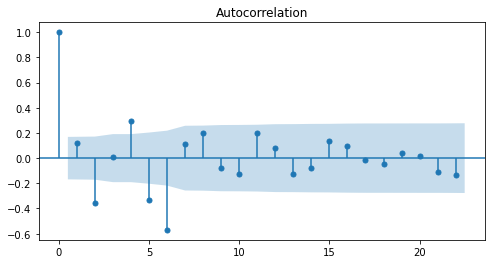

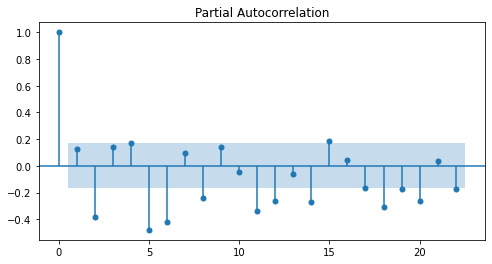

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(8,4)})
ax = plot_acf(data_diff) # Autocorrelation
ax = plot_pacf(data_diff) # Partial Autocorrelation

### Auto Regression Model Prediction
Splitting Data by consideration on Preriod. We returned `122` rows data to train with AR Model and `13` rows data as test set. Train data is splitted from `2010-04-02` till `2012-07-27` and test data is splitted from `2012-08-03` till `2012-10-26`. In term of the prediction is approximately three months prediction. 

##### Model Fitting and Prediction

In [25]:
data_diff.shape

(135, 1)

In [26]:
print(data_diff.head(122))
print(data_diff.tail(13))

            Weekly_Sales
Date                    
2010-04-02     -0.092862
2010-04-09     -0.065427
2010-04-16      0.063757
2010-04-23      0.030097
2010-04-30     -0.001681
...                  ...
2012-06-29      0.017457
2012-07-06     -0.041597
2012-07-13      0.051816
2012-07-20      0.057249
2012-07-27      0.021793

[122 rows x 1 columns]
            Weekly_Sales
Date                    
2012-08-03     -0.053592
2012-08-10     -0.043834
2012-08-17      0.057183
2012-08-24     -0.039861
2012-08-31     -0.032503
2012-09-07     -0.043633
2012-09-14      0.085833
2012-09-21      0.051166
2012-09-28      0.007143
2012-10-05     -0.050339
2012-10-12     -0.010930
2012-10-19      0.039251
2012-10-26     -0.049839


In [27]:
# Splitting Data
train = (data_diff['2010-04-02':'2012-07-27']) #  122 rows train
test = (data_diff['2012-08-03':'2012-10-26']) # 13 rows test

In [28]:
print(train.shape)
print(test.shape)

(122, 1)
(13, 1)


In [29]:
# Training Model
from statsmodels.tsa.ar_model import AR
# Ignore warning
import warnings
warnings.filterwarnings("ignore")
ar = AR(train)
ar_fit = ar.fit()

In [30]:
# AR prediction
ar_pred = ar_fit.predict(start=122, end=134)
ar_pred

2012-08-03   -0.067053
2012-08-10   -0.013688
2012-08-17    0.044794
2012-08-24   -0.013589
2012-08-31   -0.055940
2012-09-07   -0.021057
2012-09-14    0.046234
2012-09-21   -0.003713
2012-09-28   -0.033711
2012-10-05    0.001419
2012-10-12    0.034329
2012-10-19    0.010608
2012-10-26   -0.014958
Freq: W-FRI, dtype: float64

##### Evaluation

Text(0.5, 1.0, 'The correlation between Actual Variable and Prediction Varible')

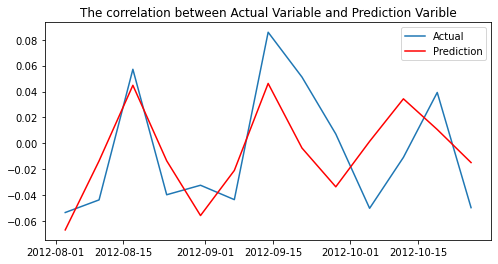

In [31]:
# plot prediction
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,4)})
plt.plot(test, label='Actual')
plt.plot(ar_pred, color='red', label='Prediction')
plt.legend()
plt.title('The correlation between Actual Variable and Prediction Varible', fontsize=12)

In [32]:
# MSR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
msr = mean_squared_error(test, ar_pred)
msr = np.round(np.sqrt(msr)*100,2)
print('Mean Squared Error of the model is: {}%'.format(msr))

# MAR
mar = mean_absolute_error(test, ar_pred)
mar = mar*100
mar = np.round(mar,2)
print('Mean Obsolute Error of the model is: {}%'.format(mar))
print('--------------\n')
acc = 1-(msr/100)
print('Accuracy: {}%'.format(acc*100))

Mean Squared Error of the model is: 3.51%
Mean Obsolute Error of the model is: 3.26%
--------------

Accuracy: 96.49%


# Regression Approach

### Loading Data

In [80]:
import pandas as pd
sale = pd.read_csv(r'C:\Users\MiT Computer\Downloads\Machine Learning_Project\Sales.csv', 
                   parse_dates = ['Date'], usecols=['Store','Date','Weekly_Sales'])
stores = pd.read_csv(r'C:\Users\MiT Computer\Downloads\Machine Learning_Project\stores.csv')
features = pd.read_csv(r'C:\Users\MiT Computer\Downloads\Machine Learning_Project\features.csv', parse_dates=['Date'])

### Data Preprocessing 

##### Duplication

In [81]:
# checking info of date in Sales Dataset.
sales_dup = sale['Date'].duplicated()
print('* Dupliacted Values of Date columns: {}'.format(sales_dup.sum()))
print('* Total Rows and Columns of Data: {}'.format(sale.shape))

* Dupliacted Values of Date columns: 421427
* Total Rows and Columns of Data: (421570, 3)


In [82]:
# checking info of date in Features Dataset.
features_dup = features['Date'].duplicated()
print('* Dupliacted Values of Date columns: {}'.format(features_dup.sum()))
print('* Total Rows and Columns of Data: {}'.format(features.shape))

* Dupliacted Values of Date columns: 8008
* Total Rows and Columns of Data: (8190, 12)


In [83]:
# checking info of date in Features Dataset.
stores_dup = stores['Store'].duplicated()
print('* Dupliacted Values of Date columns: {}'.format(stores_dup.sum()))
print('* Total Rows and Columns of Data: {}'.format(stores_dup.shape))

* Dupliacted Values of Date columns: 0
* Total Rows and Columns of Data: (45,)


##### Data Cleaning 
There are three different dataset those are `Features`, `Sales`, and `Stores` Datasets.
1. We Filtered `Features Dataset` by Date column, starting from `2010-02-05` till `2012-10-26`. 
2. Grouped by keys(Store, Date) for `Sales Dataset` and Stores Dataset mantained as default.
3. Combining all DataFrame to be one DataFrame.
4. Dealed with Missing Values in DataFrame by Visualizing Missing Data and fillna values by zero based on the context. 

In [84]:
# features
start_date = "2010-02-05"
end_date = "2012-10-26"
after_start_date = features["Date"] >= start_date
before_end_date = features["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = features.loc[between_two_dates]
features = filtered_dates
print('     Features Data    ')
print('----------------------\n')
print(features.iloc[:,0:2])
print('----------------------\n')

# sales 
sales = pd.DataFrame(sale.groupby(['Store','Date'],as_index=False).Weekly_Sales.sum())
print('      Sales Data    ')
print('----------------------\n')
print(features.iloc[:,0:2])
print('----------------------\n')

# stores 
print('      Sales Data    ')
print('----------------------\n')
print(stores.tail())
print('----------------------\n')

     Features Data    
----------------------

      Store       Date
0         1 2010-02-05
1         1 2010-02-12
2         1 2010-02-19
3         1 2010-02-26
4         1 2010-03-05
...     ...        ...
8146     45 2012-09-28
8147     45 2012-10-05
8148     45 2012-10-12
8149     45 2012-10-19
8150     45 2012-10-26

[6435 rows x 2 columns]
----------------------

      Sales Data    
----------------------

      Store       Date
0         1 2010-02-05
1         1 2010-02-12
2         1 2010-02-19
3         1 2010-02-26
4         1 2010-03-05
...     ...        ...
8146     45 2012-09-28
8147     45 2012-10-05
8148     45 2012-10-12
8149     45 2012-10-19
8150     45 2012-10-26

[6435 rows x 2 columns]
----------------------

      Sales Data    
----------------------

    Store Type    Size
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221
----------------------



In [85]:
# Combination of sales and features dataset as 'sales_features'
sales_features = pd.merge(sales, features, how='left', on=['Store','Date'])

# Combination of sales_features and stores as 'stores_sales_features'
stores_sales_features = pd.merge(sales_features,stores, on='Store', how='left')
print('                         stores_sales_features                            ')
print('------------------------------------------------------------------------\n')
print(stores_sales_features.tail())

                         stores_sales_features                            
------------------------------------------------------------------------

      Store       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
6430     45 2012-09-28     713173.95        64.88       3.997    4556.61   
6431     45 2012-10-05     733455.07        64.89       3.985    5046.74   
6432     45 2012-10-12     734464.36        54.47       4.000    1956.28   
6433     45 2012-10-19     718125.53        56.47       3.969    2004.02   
6434     45 2012-10-26     760281.43        58.85       3.882    4018.91   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
6430      20.64       1.50    1601.01    3288.25  192.013558         8.684   
6431        NaN      18.82    2253.43    2340.01  192.170412         8.667   
6432        NaN       7.89     599.32    3990.54  192.327265         8.667   
6433        NaN       3.18     437.73    1537.49  192.330854         8.667   
6434

* Missing Values of all Markdown (Discount)
-------------------------------------------

- Missing Values of Markdown1: 4155
- Missing Values of Markdown2: 4798
- Missing Values of Markdown3: 4389
- Missing Values of Markdown4: 4470
- Missing Values of Markdown5: 4140
---------------------------------------------------------

* Percentage of Missing Values for all Markdown (Discount)
---------------------------------------------------------

- Missing Values of Markdown1: 64.56876456876456
- Missing Values of Markdown2: 74.56099456099456
- Missing Values of Markdown3: 68.2051282051282
- Missing Values of Markdown4: 69.46386946386947
- Missing Values of Markdown5: 64.33566433566433
---------------------------------------------------------



<AxesSubplot:>

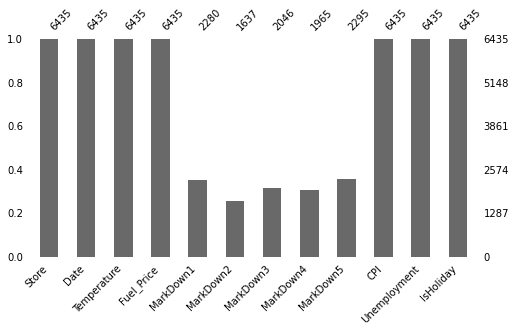

In [86]:
# Find out numbers of missing values.
import numpy as np
num_missing_vals = stores_sales_features.isnull().sum()
arr_missing_vals = np.array(num_missing_vals)
print('* Missing Values of all Markdown (Discount)')
print('-------------------------------------------\n')
count = 1
for num_vals in arr_missing_vals:
    if num_vals > 0 :
        print('- Missing Values of Markdown{}: {}'.format(count, num_vals)) 
        count += 1
print('---------------------------------------------------------\n')

# Find out missing values as Percentage.
import numpy as np
pct_missing_vals = features.isnull().mean()*100
arr_missing_pct = np.array(pct_missing_vals)
print('* Percentage of Missing Values for all Markdown (Discount)')
print('---------------------------------------------------------\n')
count = 1
for pct_vals in arr_missing_pct:
    if pct_vals >= 50:
        print('- Missing Values of Markdown{}: {}'.format(count, pct_vals)) 
        count += 1
print('---------------------------------------------------------\n')   

# visualizing missing values
import missingno as msno
msno.bar(features, figsize=(8, 4), fontsize=10)

In [87]:
# To put zero numbers in all MarkDown columns instead of N/A values.
stores_sales_features['MarkDown1'].fillna(0, inplace=True)
stores_sales_features['MarkDown2'].fillna(0, inplace=True)
stores_sales_features['MarkDown3'].fillna(0, inplace=True)
stores_sales_features['MarkDown4'].fillna(0, inplace=True)
stores_sales_features['MarkDown5'].fillna(0, inplace=True)
print('                            Cleaned Dataset                           ')
print('------------------------------------------------------------------------\n')
regress_df = stores_sales_features
print(regress_df.head())

                            Cleaned Dataset                           
------------------------------------------------------------------------

   Store       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0      1 2010-02-05    1643690.90        42.31       2.572        0.0   
1      1 2010-02-12    1641957.44        38.51       2.548        0.0   
2      1 2010-02-19    1611968.17        39.93       2.514        0.0   
3      1 2010-02-26    1409727.59        46.63       2.561        0.0   
4      1 2010-03-05    1554806.68        46.50       2.625        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        0.0        0.0        0.0        0.0  211.096358         8.106   
1        0.0        0.0        0.0        0.0  211.242170         8.106   
2        0.0        0.0        0.0        0.0  211.289143         8.106   
3        0.0        0.0        0.0        0.0  211.319643         8.106   
4        0.0        0.0        0.0       

##### Data Transformation
The DataFrame contains a column `IsHoliday`. that's Boolean Datatype, therefore here's the way we need to transform boolean to int(0 and 1) to make this columns can be used to fit with Regression Model.

In [88]:
import pandas as pd
regress_df['IsHoliday'] = regress_df['IsHoliday'].astype(int)
print(regress_df['IsHoliday'].head())

0    0
1    1
2    0
3    0
4    0
Name: IsHoliday, dtype: int32


In [89]:
regress_df['AllMarkDowns'] = regress_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
regress_df.drop(columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace=True)
regress_df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,AllMarkDowns
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,0,A,151315,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,A,151315,0.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,0,A,151315,0.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,0,A,151315,0.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,0,A,151315,0.0


In [90]:
regress_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday                int32
Type                    object
Size                     int64
AllMarkDowns           float64
dtype: object

### Analytics
Providing Some Visualisation to observe such Weekly Sales by Store Types and also Performance of Weekly Sales. Including Statistical Information, and Correlation between each feature in DataFrame. 

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

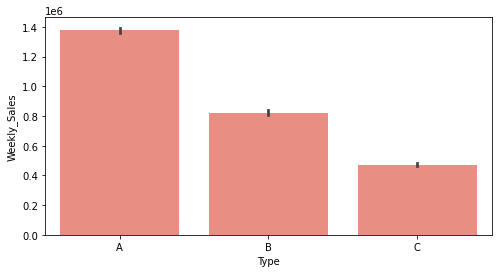

In [116]:
# Weekly Sales by Store Type
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,4
sns.barplot(data=regress_df, x='Type', y='Weekly_Sales', color='salmon')

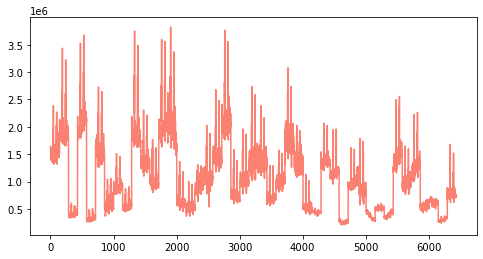

In [117]:
# Performace of Weekly_Sales
import matplotlib.pyplot as plt
plt.plot(regress_df['Weekly_Sales'], c='salmon')

In [118]:
# statistic infomation
count = regress_df['Weekly_Sales'].count()
mean = regress_df['Weekly_Sales'].mean()
var = regress_df['Weekly_Sales'].var()
std = regress_df['Weekly_Sales'].std()
keys = np.array(['Number', 'Average', 'Variance', 'Standard Diviation'])
values = np.array([count, mean, var, std])
stats = dict(zip(keys, values))
for key, value in stats.items():
    print('{} of Weekly_Sales: {}'.format(key, value))
    print('------------')

Number of Weekly_Sales: 6435.0
------------
Average of Weekly_Sales: 1046964.8775617732
------------
Variance of Weekly_Sales: 318509684088.3009
------------
Standard Diviation of Weekly_Sales: 564366.6220536974
------------


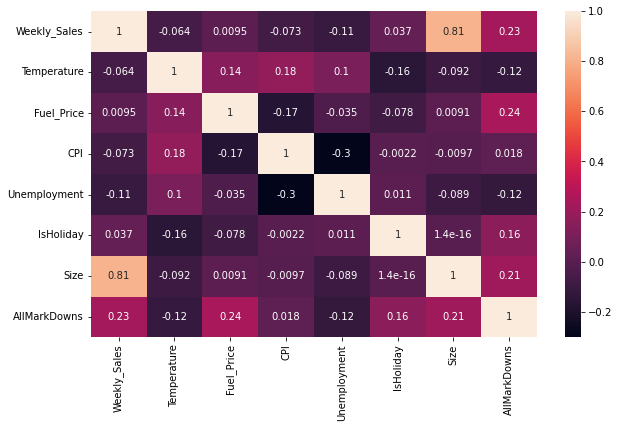

In [119]:
# correlation
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = regress_df.drop(columns = ['Store','Date', 'Type'])
corr = df.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, annot=True)

### Linear Regression Model
Linear Regression Line has an equation in form of $ Y = a + bX $ , where $X$ is the exploratory variable and $Y$ is dependent variable. The equation contains $b$ as slope of the line and $a$ as intercept.

##### Data Providing & Splitting Data

After provided data for X-axis and Y-axis we splitted Data as four parts those are: $X train, y train, X test, y test$ by using `train_test_split` function in scikit-learn, then converted all of those to 2 dimensional array.

In [95]:
regress_df.tail()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,AllMarkDowns
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,0,B,118221,9468.01
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,0,B,118221,9659.00
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,0,B,118221,6554.03
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,0,B,118221,3982.42
6434,45,2012-10-26,760281.43,58.85,3.882,192.308899,8.667,0,B,118221,5247.26


In [96]:
# Train Test Split Data for Linear Regression
X = regress_df.drop(['Store','Date','Weekly_Sales','Type', 'IsHoliday'], axis=1).values
y = regress_df['Weekly_Sales'].values

# splitting data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
print('X_train: {} and y_train: {}'.format((X_train.shape),(y_train.shape)))
print('X_test: {} and y_test: {}'.format((X_test.shape),(y_test.shape)))

X_train: (5148, 6) and y_train: (5148,)
X_test: (1287, 6) and y_test: (1287,)


In [97]:
print(X)
print(y)

[[4.23100000e+01 2.57200000e+00 2.11096358e+02 8.10600000e+00
  1.51315000e+05 0.00000000e+00]
 [3.85100000e+01 2.54800000e+00 2.11242170e+02 8.10600000e+00
  1.51315000e+05 0.00000000e+00]
 [3.99300000e+01 2.51400000e+00 2.11289143e+02 8.10600000e+00
  1.51315000e+05 0.00000000e+00]
 ...
 [5.44700000e+01 4.00000000e+00 1.92327265e+02 8.66700000e+00
  1.18221000e+05 6.55403000e+03]
 [5.64700000e+01 3.96900000e+00 1.92330854e+02 8.66700000e+00
  1.18221000e+05 3.98242000e+03]
 [5.88500000e+01 3.88200000e+00 1.92308899e+02 8.66700000e+00
  1.18221000e+05 5.24726000e+03]]
[1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]


##### Standard Scaling

In [98]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()

# Scale X train and test
X_train = xScaler.fit_transform(X_train)
X_test = xScaler.transform(X_test)

# Scale y train and test
yScaler = StandardScaler()
y_train = yScaler.fit_transform(y_train.reshape(-1,1))
y_test = yScaler.transform(y_test.reshape(-1,1))

# make y_train and y_test to be 1 dimensional array.
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print('X_train')
print(X_train)
print('-------\n')
print('X_test')
print(X_test)
print('-------\n')
print('y_train')
print(y_train)
print('-------\n')
print('y_test')
print(y_test)

X_train
[[ 0.681045    0.93482068  1.19641055 -0.92332188  0.38528249 -0.43792773]
 [ 0.7839933   1.18052737  1.11204266 -0.0461338  -1.38971425 -0.43792773]
 [-0.94282893 -0.85905559 -0.98727266  0.70543494 -0.15985323 -0.43792773]
 ...
 [ 0.56129988  1.8393692  -1.08608065  3.07019229  1.1964381  -0.43792773]
 [-0.28666899  0.69781157 -1.06759323 -0.07673338 -1.44193959 -0.21105887]
 [-1.15143469  1.22401528 -0.9522449  -1.73716346  0.38536167 -0.43792773]]
-------

X_test
[[ 0.6956745   1.00657573 -0.85528746  0.09451692  1.15711866  3.47850302]
 [-1.41368193  0.1107248  -1.10073438 -0.61786287 -0.59477414 -0.43792773]
 [-0.75264549 -0.79817251  1.00333245  0.20295755 -1.43845579 -0.43792773]
 ...
 [ 1.50246404  0.47602324  1.19118026 -0.24154167  1.21539315 -0.43792773]
 [ 1.57181869 -1.50485104  1.00145968  0.04405445 -1.38971425 -0.43792773]
 [-0.18588803  0.87393761 -0.90118352 -1.84291992 -0.25676624 -0.43792773]]
-------

y_train
[-0.34266241 -1.11209466  0.0539866  ...  0.359

##### Model Fitting and Prediction

In [99]:
# Model Fitting
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train).get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [100]:
# Prediction
predictions = regressor.predict(X_test)
print('Prediction')
print(predictions)
print('-------------\n')
print('Testing')
print(y_test)

Prediction
[ 1.24452003 -0.4282496  -1.28915524 ...  0.8788481  -1.09531024
 -0.07826596]
-------------

Testing
[ 0.51707849 -0.48383102 -0.82937497 ...  0.38288027 -1.07209782
  0.42289641]


##### Model Evaluation
- An evaluated metric we used is Mean Squared Error or MSE. $ (1/n) * Σ(actual – forecast)^2 $
- $R^2$ is a metric that is used for calculating accuracy of Prediction.
- `Coeffecient` indicates the direction of relationship between a Target Variable and Independent Variables.

Feature scored of Temperature is: 0.048474
Feature scored of Fuel_Price is: -0.045671
Feature scored of CPI is: -0.101101
Feature scored of Unemployment is: -0.062873
Feature scored of Size is: 0.794291
Feature scored of AllMarkDowns is: 0.073926


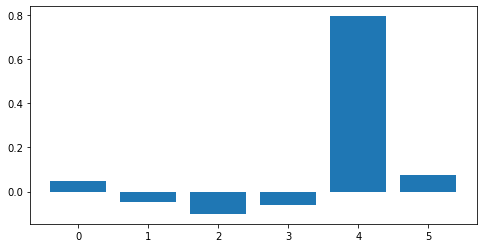

In [101]:
# Coeffecient
import numpy as np
from matplotlib import pyplot
keys = regress_df.drop(['Store','Date','Weekly_Sales','Type', 'IsHoliday'], axis=1).columns
values = np.round(regressor.coef_,6)
dictionary = dict(zip(keys, values))
for key,value in dictionary.items():
    print('Feature scored of {} is: {}'.format(key,value))
    
# plot feature importance
pyplot.bar([x for x in range(len(values))], values)
pyplot.show()

In [102]:
# New DataFrame
import pandas as pd
test_data = pd.DataFrame(y_test.reshape(-1,1),columns=['Actual',])
pred_data = pd.DataFrame(predictions.reshape(-1,1), columns=['Prediction'])
new_df = pd.concat([test_data,pred_data], axis=1)
new_df['Diff'] = new_df['Prediction'] - new_df['Actual']
new_df.head()

,Actual,Prediction,Diff
0,0.517078,1.244520,0.727442
1,-0.483831,-0.428250,0.055581
2,-0.829375,-1.289155,-0.459780
3,-0.799875,-0.226582,0.573293
4,-1.170255,-1.314259,-0.144004


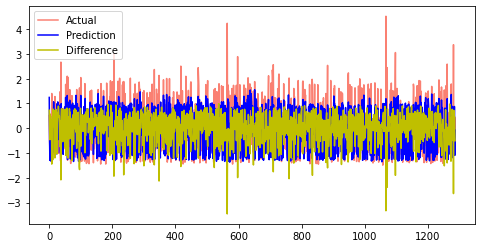

In [103]:
# Plotting Actual and Prediction 
import matplotlib.pyplot as plt
plt.plot(new_df['Actual'], c='salmon', label='Actual')
plt.plot(new_df['Prediction'], c='b', label='Prediction')
plt.plot(new_df['Diff'], c='y', label='Difference')
plt.legend()

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
intercept = regressor.intercept_
print('Intercept is: {}'.format(intercept)) # y_intercept

err = mean_squared_error(predictions, y_test)
mean_sqrt_error = np.sqrt(err)
print('Mean squared error is: {}'.format(mean_sqrt_error)) # mean squared error
print('-----------------\n')
print('Accuracy is {}%'.format(np.round((r2_score(y_test, predictions)*100),2))) # R-squared accuracy

Intercept is: 2.8227041298359295e-15
Mean squared error is: 0.5818369570659961
-----------------

Accuracy is 66.79%


### Polynomial Regression Model
Polynomial Regression Model with Scikit-Learn is also very similar to Linear Regression model. Polynomial contains only one more step: that is we need to  transform the array of inputs to include `non-linear terms` such as $x^2$.

##### Tranform input data

In [105]:
from sklearn.preprocessing import PolynomialFeatures
transf_X_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
transf_X_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
print(transf_X_train)
print('---------------\n')
print(transf_X_test)

[[ 0.681045    0.93482068  1.19641055 ...  0.1484426  -0.16872589
   0.1917807 ]
 [ 0.7839933   1.18052737  1.11204266 ...  1.93130568  0.6085944
   0.1917807 ]
 [-0.94282893 -0.85905559 -0.98727266 ...  0.02555305  0.07000416
   0.1917807 ]
 ...
 [ 0.56129988  1.8393692  -1.08608065 ...  1.43146414 -0.52395342
   0.1917807 ]
 [-0.28666899  0.69781157 -1.06759323 ...  2.07918979  0.30433415
   0.04454585]
 [-1.15143469  1.22401528 -0.9522449  ...  0.14850361 -0.16876056
   0.1917807 ]]
---------------

[[ 0.6956745   1.00657573 -0.85528746 ...  1.33892358  4.02504074
  12.09998328]
 [-1.41368193  0.1107248  -1.10073438 ...  0.35375628  0.26046809
   0.1917807 ]
 [-0.75264549 -0.79817251  1.00333245 ...  2.06915506  0.62993968
   0.1917807 ]
 ...
 [ 1.50246404  0.47602324  1.19118026 ...  1.47718051 -0.53225436
   0.1917807 ]
 [ 1.57181869 -1.50485104  1.00145968 ...  1.93130568  0.6085944
   0.1917807 ]
 [-0.18588803  0.87393761 -0.90118352 ...  0.0659289   0.11244506
   0.1917807 ]]


##### Fit and Prediction

In [106]:
# fit model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(transf_X_train, y_train).get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [107]:
# Prediction
predictions = regressor.predict(transf_X_test)
print('Prediction')
print(predictions)
print('-------------\n')
print('Actual')
print(y_test)

Prediction
[ 1.40562918 -0.49343802 -0.9674312  ...  0.92033543 -1.20905783
 -0.05010305]
-------------

Actual
[ 0.51707849 -0.48383102 -0.82937497 ...  0.38288027 -1.07209782
  0.42289641]


##### Evaluation and Validation

In [108]:
# New DataFrame
import pandas as pd
test_data = pd.DataFrame(y_test.reshape(-1,1),columns=['Actual',])
pred_data = pd.DataFrame(predictions.reshape(-1,1), columns=['Prediction'])
new_data = pd.concat([test_data,pred_data], axis=1)
new_data['Diff'] = new_data['Prediction'] - new_data['Actual']
new_data.head()

,Actual,Prediction,Diff
0,0.517078,1.405629,0.888551
1,-0.483831,-0.493438,-0.009607
2,-0.829375,-0.967431,-0.138056
3,-0.799875,-0.252780,0.547095
4,-1.170255,-1.154373,0.015882


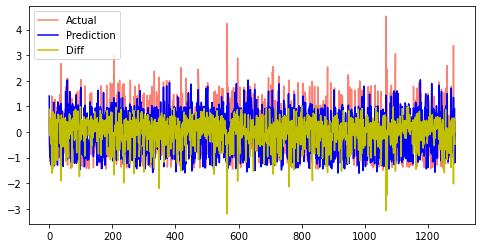

In [109]:
# plotting Actual and Prediction 
import matplotlib.pyplot as plt
plt.plot(new_data['Actual'], c='salmon', label='Actual')
plt.plot(new_data['Prediction'], c='b', label='Prediction')
plt.plot(new_data['Diff'], c='y', label='Diff')
plt.legend()

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
intercept = regressor.intercept_
print('Intercept is: {}'.format(intercept)) # y_intercept

err = mean_squared_error(predictions, y_test)
mean_sqrt_error = np.sqrt(err)
print('Mean squared error is: {}'.format(mean_sqrt_error)) # mean squared error
print('----------------\n')
print('Accuracy is {}%'.format(np.round((r2_score(y_test, predictions)*100),2))) # R-squared accuracy

Intercept is: -0.149531107580407
Mean squared error is: 0.5462122048951249
----------------

Accuracy is 70.73%


### Support Vector Regression

Support Vector Machine or SVM can also be used as regression method, called Support Vector Regression or SVR. SVR has equation as $y= wx+b$, it's similar to Linear Regression as well. However, it is unlike other regression model that try to minimize the error between actual and predictive values. SVR try to fit the best line within a threshold value. (Distance between hyperplane and parellel line). SVR model tries to satisfy condition: $-a < y-wx+b < a$

##### Fitting and Predictive Modeling
We called `X_train` and `y_train` from Linear Regression Modeling that we've just splitted and transformed readily. 

In [111]:
# Fitting model
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train).get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [112]:
# Prediction
prediction = svr.predict(X_test)
print('Prediction')
print(prediction)
print('--------------------\n')
print('y_test')
print(y_test)

Prediction
[ 1.11542138 -0.41212418 -1.03498398 ...  0.74056134 -1.07933312
  0.04322914]
--------------------

y_test
[ 0.51707849 -0.48383102 -0.82937497 ...  0.38288027 -1.07209782
  0.42289641]


##### Validation & Evaluation
Mean Absolute Error or MAE is the average amount of error in measurement. Formula: $ (Δx) = |xi – x| $

In [113]:
# New DataFrame
import pandas as pd
test_data = pd.DataFrame(y_test.reshape(-1,1),columns=['Actual',])
pred_data = pd.DataFrame(prediction.reshape(-1,1), columns=['Prediction'])
new_svr = pd.concat([test_data,pred_data], axis=1)
new_svr['Diff'] = new_svr['Prediction'] - new_svr['Actual']
new_svr.head()

,Actual,Prediction,Diff
0,0.517078,1.115421,0.598343
1,-0.483831,-0.412124,0.071707
2,-0.829375,-1.034984,-0.205609
3,-0.799875,-0.642309,0.157566
4,-1.170255,-1.120691,0.049564


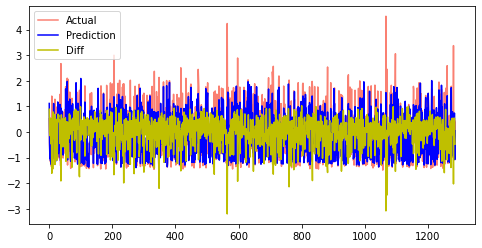

In [114]:
# plotting Actual and Prediction 
import matplotlib.pyplot as plt
plt.plot(new_svr['Actual'], c='salmon', label='Actual')
plt.plot(new_svr['Prediction'], c='b', label='Prediction')
plt.plot(new_data['Diff'], c='y', label='Diff')
plt.legend()

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

msr = np.round((mean_squared_error(y_test, prediction))*100,2)
print('Mean_squared_error is: {}%'.format(msr))

mar = np.round((mean_absolute_error(y_test, prediction))*100,2)
print('Mean_absolute_error is: {}%'.format(mar))
print('--------------\n')

r2 = np.round((r2_score(y_test, prediction))*100,2)
print('R-squared of the model is: {}%'.format(r2))

Mean_squared_error is: 24.32%
Mean_absolute_error is: 32.17%
--------------

R-squared of the model is: 76.14%
